# Analysis Visualizer

Comprehensive visualization tools for analyzing experimental results using `analyze_experiments.py`.

## Features

- **Priority 1**: Scaling Law analysis (Model Size vs Structural Damage)
- **Priority 2**: Placebo Test visualization (Treatment specificity)
- **Priority 3**: Mechanism Test comparison (Optimizer effects)
- **Priority 4**: Shield Matrix visualization (Quantization defense)

## Usage

This notebook demonstrates how to:
1. Run analysis scripts programmatically
2. Load and visualize analysis results
3. Create custom visualizations from analysis outputs

In [1]:
import subprocess
import sys
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown

# Setup paths
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
experiment_dir = project_root / "experiments" / "01_pythia_160m"
analyze_script = experiment_dir / "analyze_experiments.py"

# Visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Analysis Visualizer Setup Complete")
print(f"Project root: {project_root}")
print(f"Analysis script: {analyze_script}")

📊 Analysis Visualizer Setup Complete
Project root: /backup/d.yin/NeuroEntropy
Analysis script: /backup/d.yin/NeuroEntropy/experiments/01_pythia_160m/analyze_experiments.py


In [4]:
# Priority 1: Scaling Law Analysis
# ===================================

def run_priority1_analysis(results_dir, models, output_dir):
    """
    Run Priority 1 analysis: Scaling Law (Model Size vs Structural Damage)
    """
    cmd = [
        sys.executable,
        str(analyze_script),
        "1",
        "--results-dir", str(results_dir),
        "--models"] + models + [
        "--output-dir", str(output_dir)
    ]
    
    print(f"Running Priority 1 analysis...")
    print(f"Command: {' '.join(cmd)}\n")
    
    result = subprocess.run(cmd, cwd=str(project_root), capture_output=True, text=True)
    
    if result.returncode == 0:
        print("✅ Analysis completed successfully!")
        print(result.stdout)
        return True
    else:
        print("❌ Analysis failed:")
        print(result.stderr)
        return False

def visualize_priority1_results(output_dir):
    """
    Load and display Priority 1 analysis results
    """
    output_path = Path(output_dir)
    
    # Load summary data
    summary_csv = output_path / "scaling_law_summary.csv"
    summary_json = output_path / "scaling_law_summary.json"
    plot_png = output_path / "scaling_law_curve.png"
    
    if summary_csv.exists():
        df = pd.read_csv(summary_csv)
        print("\n📊 Summary Statistics:")
        print(df.to_string(index=False))
    
    if summary_json.exists():
        with open(summary_json, 'r') as f:
            data = json.load(f)
        print(f"\n📈 Data points: {len(data)} models")
    
    if plot_png.exists():
        print(f"\n📉 Scaling Law Plot:")
        display(Image(str(plot_png)))
    else:
        print("⚠️ Plot not found. Run analysis first.")

print("✅ Analysis functions ready!")

✅ Analysis functions ready!


In [6]:
# Priority 2: Placebo Test Analysis
# ===================================

def run_priority2_analysis(results_dir, model, treatments, output_dir):
    """
    Run Priority 2 analysis: Placebo Test (Treatment Specificity)
    """
    cmd = [
        sys.executable,
        str(analyze_script),
        "2",
        "--results-dir", str(results_dir),
        "--model", model,
        "--treatments"] + treatments + [
        "--output-dir", str(output_dir)
    ]
    
    print(f"Running Priority 2 analysis...")
    print(f"Command: {' '.join(cmd)}\n")
    
    result = subprocess.run(cmd, cwd=str(project_root), capture_output=True, text=True)
    
    if result.returncode == 0:
        print("✅ Analysis completed successfully!")
        print(result.stdout)
        return True
    else:
        print("❌ Analysis failed:")
        print(result.stderr)
        return False

def visualize_priority2_results(output_dir):
    """
    Load and display Priority 2 analysis results
    """
    output_path = Path(output_dir)
    
    summary_csv = output_path / "placebo_summary.csv"
    summary_json = output_path / "placebo_summary.json"
    plot_png = output_path / "placebo_comparison.png"
    
    if summary_csv.exists():
        df = pd.read_csv(summary_csv)
        print("\n📊 Treatment Comparison:")
        print(df.to_string(index=False))
    
    if summary_json.exists():
        with open(summary_json, 'r') as f:
            data = json.load(f)
        if 'statistical_tests' in data:
            print("\n📈 Statistical Tests:")
            anova = data['statistical_tests']['anova']
            print(f"  ANOVA: F={anova.get('f_statistic', 'N/A'):.3f}, p={anova.get('p_value', 'N/A'):.3f}")
    
    if plot_png.exists():
        print(f"\n📉 Treatment Comparison Plot:")
        display(Image(str(plot_png)))

In [7]:
# Priority 3: Mechanism Test Analysis
# ===================================

def run_priority3_analysis(results_dir, model, optimizers, output_dir):
    """
    Run Priority 3 analysis: Mechanism Test (Optimizer Comparison)
    """
    cmd = [
        sys.executable,
        str(analyze_script),
        "3",
        "--results-dir", str(results_dir),
        "--model", model,
        "--optimizers"] + optimizers + [
        "--output-dir", str(output_dir)
    ]
    
    print(f"Running Priority 3 analysis...")
    print(f"Command: {' '.join(cmd)}\n")
    
    result = subprocess.run(cmd, cwd=str(project_root), capture_output=True, text=True)
    
    if result.returncode == 0:
        print("✅ Analysis completed successfully!")
        print(result.stdout)
        return True
    else:
        print("❌ Analysis failed:")
        print(result.stderr)
        return False

def visualize_priority3_results(output_dir):
    """
    Load and display Priority 3 analysis results
    """
    output_path = Path(output_dir)
    
    summary_csv = output_path / "mechanism_summary.csv"
    summary_json = output_path / "mechanism_summary.json"
    plot_png = output_path / "mechanism_comparison.png"
    
    if summary_csv.exists():
        df = pd.read_csv(summary_csv)
        print("\n📊 Optimizer Comparison:")
        print(df.to_string(index=False))
    
    if summary_json.exists():
        with open(summary_json, 'r') as f:
            data = json.load(f)
        if 'statistical_test' in data:
            test = data['statistical_test']
            print("\n📈 Statistical Test:")
            print(f"  Type: {test.get('test_type', 'N/A')}")
            print(f"  p-value: {test.get('p_value', 'N/A'):.3f}")
    
    if plot_png.exists():
        print(f"\n📉 Optimizer Comparison Plot:")
        display(Image(str(plot_png)))

In [8]:
# Priority 4: Shield Matrix Analysis
# ===================================

def run_priority4_analysis(results_dir, model, precisions, output_dir):
    """
    Run Priority 4 analysis: Shield Matrix (Quantization Defense)
    """
    cmd = [
        sys.executable,
        str(analyze_script),
        "4",
        "--results-dir", str(results_dir),
        "--model", model,
        "--precisions"] + precisions + [
        "--output-dir", str(output_dir)
    ]
    
    print(f"Running Priority 4 analysis...")
    print(f"Command: {' '.join(cmd)}\n")
    
    result = subprocess.run(cmd, cwd=str(project_root), capture_output=True, text=True)
    
    if result.returncode == 0:
        print("✅ Analysis completed successfully!")
        print(result.stdout)
        return True
    else:
        print("❌ Analysis failed:")
        print(result.stderr)
        return False

def visualize_priority4_results(output_dir):
    """
    Load and display Priority 4 analysis results
    """
    output_path = Path(output_dir)
    
    summary_csv = output_path / "shield_summary.csv"
    summary_json = output_path / "shield_summary.json"
    plot_png = output_path / "shield_matrix.png"
    
    if summary_csv.exists():
        df = pd.read_csv(summary_csv)
        print("\n📊 Quantization Shield Comparison:")
        print(df.to_string(index=False))
    
    if summary_json.exists():
        with open(summary_json, 'r') as f:
            data = json.load(f)
        if 'statistical_tests' in data:
            print("\n📈 Statistical Tests:")
            anova = data['statistical_tests']['anova']
            print(f"  ANOVA: F={anova.get('f_statistic', 'N/A'):.3f}, p={anova.get('p_value', 'N/A'):.3f}")
    
    if plot_png.exists():
        print(f"\n📉 Shield Matrix Plot:")
        display(Image(str(plot_png)))

## Example Usage

Below are examples of how to use the analysis functions. Adjust paths based on your experiment results.


📊 Summary Statistics:
model_name   model_size  model_size_millions  num_runs  mean_rank_reduction_pct  std_dev_rank_reduction_pct  min_rank_reduction_pct  max_rank_reduction_pct  mean_baseline_rank  mean_post_attack_rank  mean_baseline_perplexity  std_dev_baseline_perplexity  min_baseline_perplexity  max_baseline_perplexity  mean_post_attack_perplexity  std_dev_post_attack_perplexity  min_post_attack_perplexity  max_post_attack_perplexity  mean_perplexity_increase_pct  std_dev_perplexity_increase_pct  min_perplexity_increase_pct  max_perplexity_increase_pct
       70m   70000000.0                 70.0        10                    2.975                      3.0399                    0.03                    9.72              3.3187                 3.4173                 2739.9087                          0.0                2739.9087                2739.9087                 1.454368e+05                    1.794598e+05                  22105.5792                5.151148e+05               

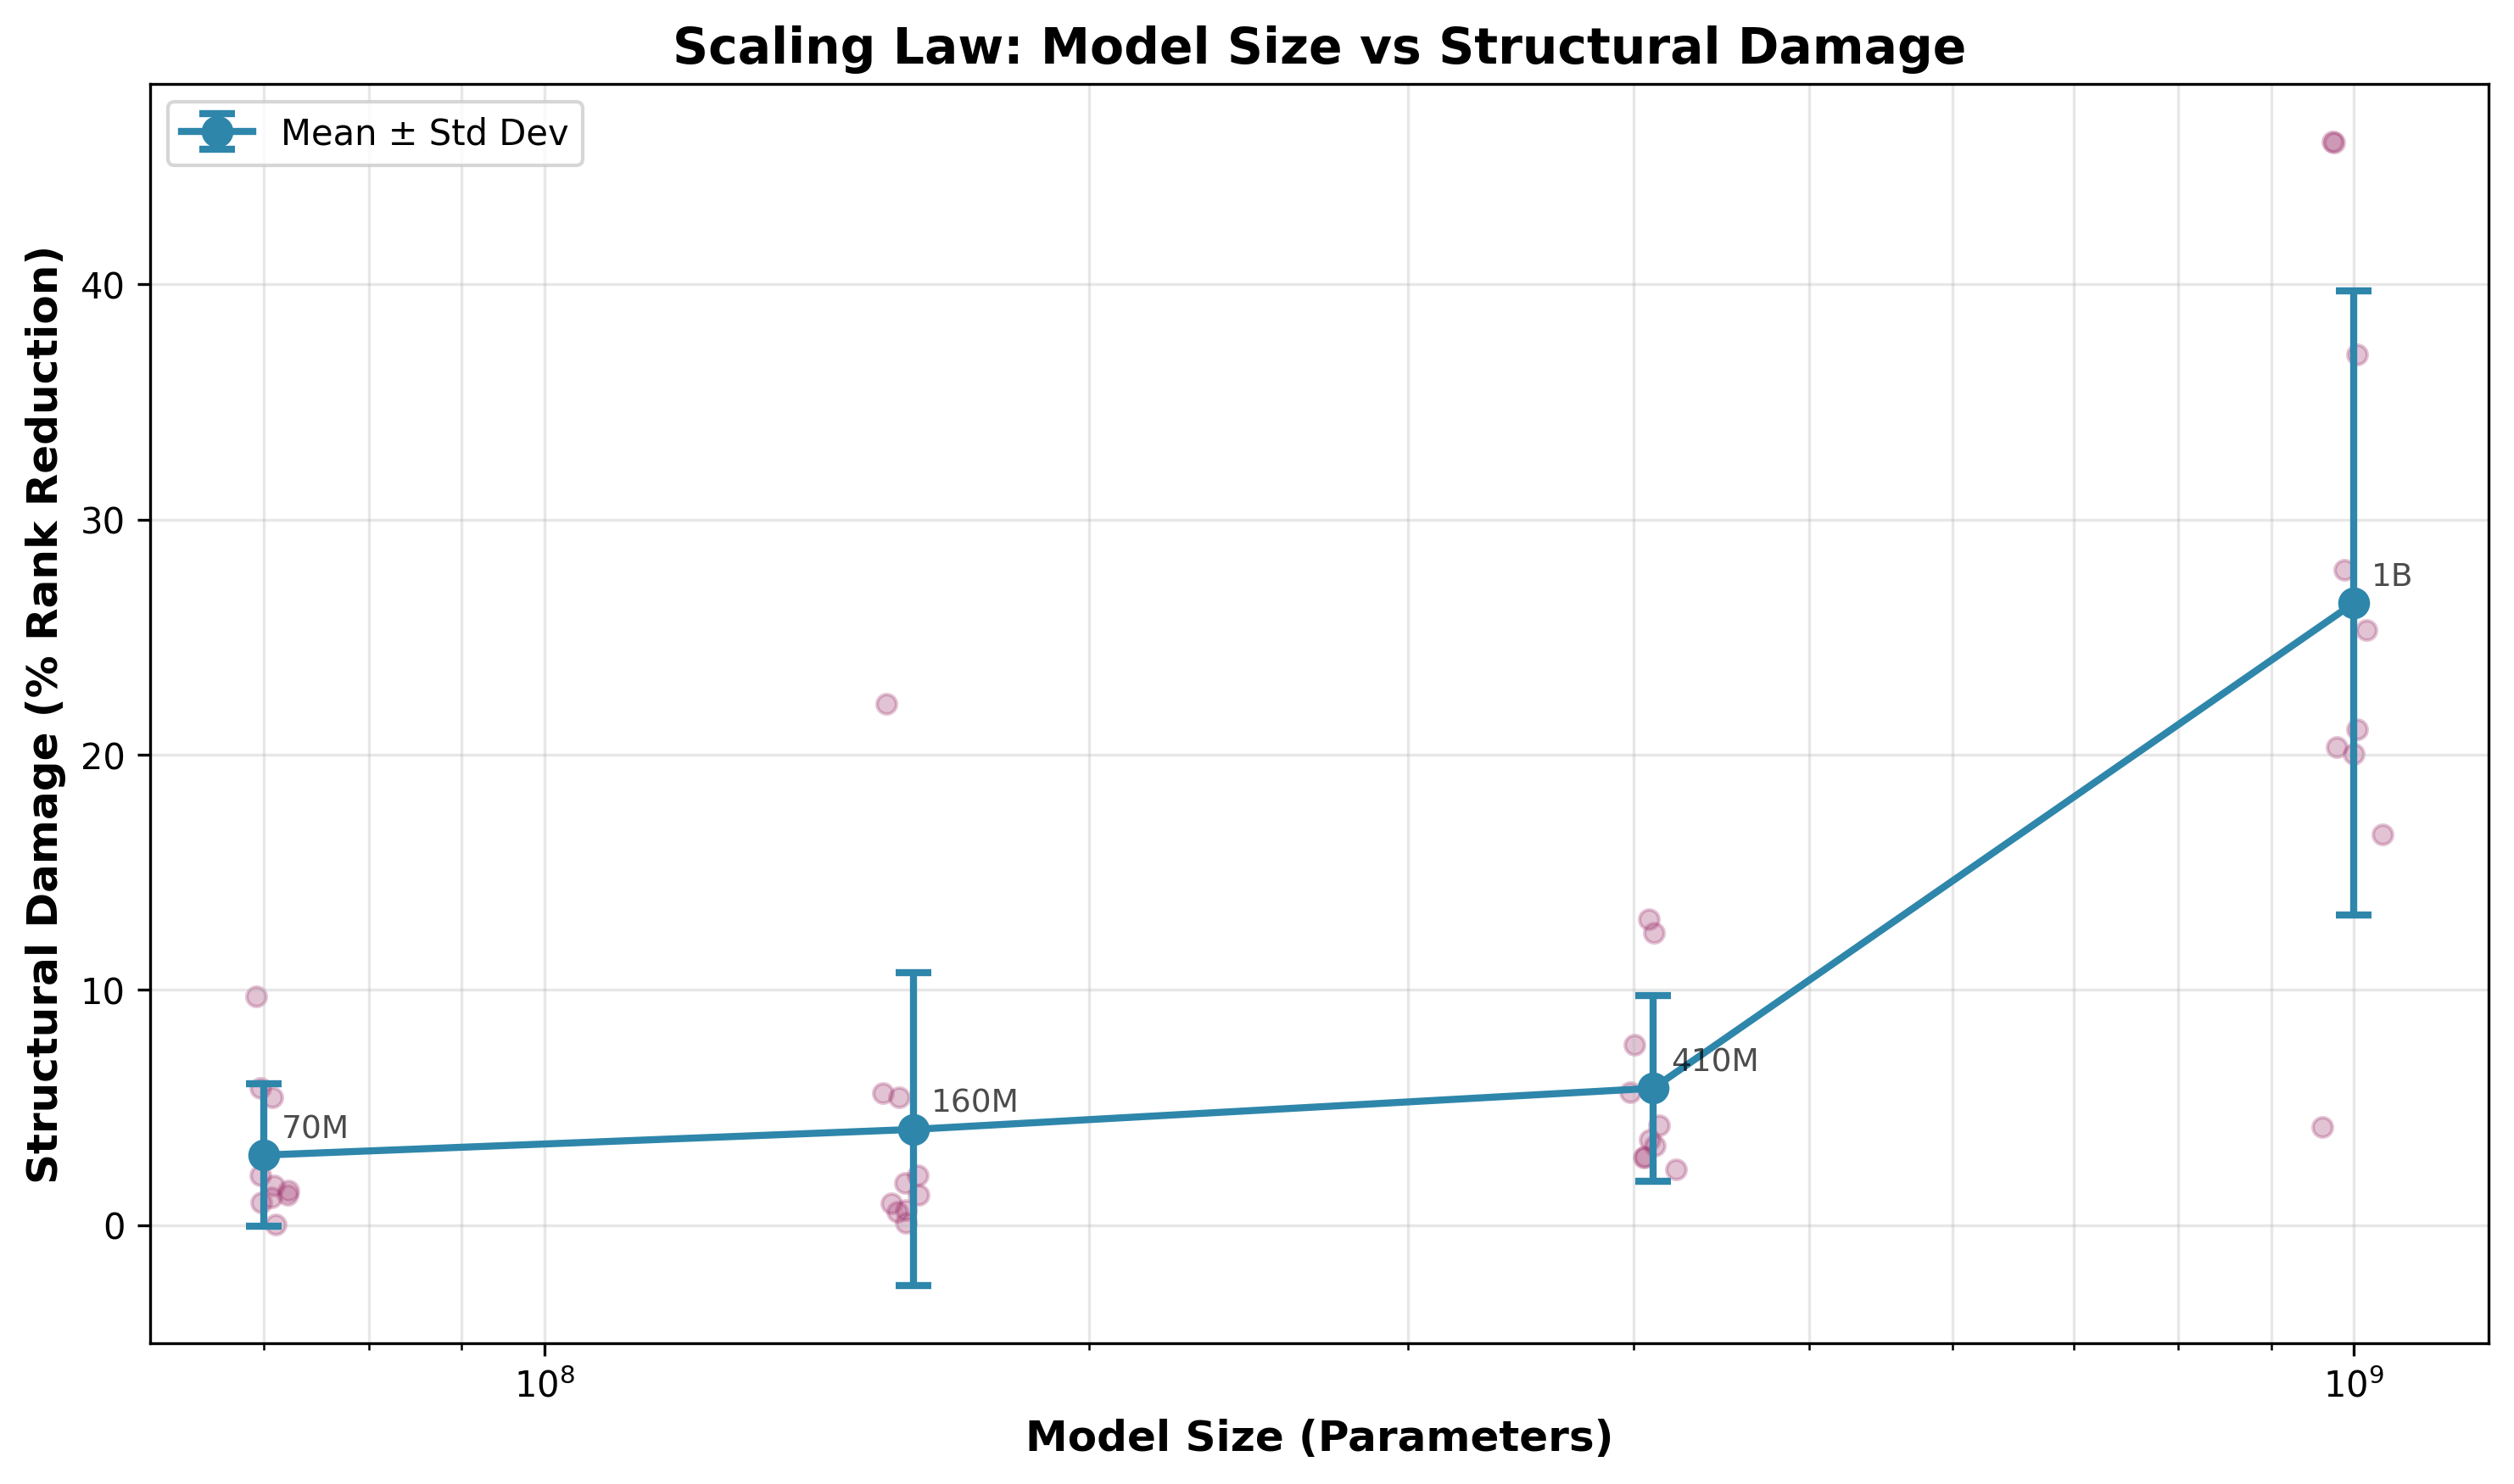

In [9]:
# Example 1: Priority 1 - Scaling Law Analysis
# ==============================================

results_dir = project_root / "experiments" / "results" / "priority1_scaling_law" / "raw_data"
output_dir = project_root / "experiments" / "results" / "priority1_scaling_law"
models = ["70m", "160m", "410m", "1b"]

# Uncomment to run analysis:
# run_priority1_analysis(results_dir, models, output_dir)

# Visualize results (if analysis has been run):
if output_dir.exists():
    visualize_priority1_results(output_dir)
else:
    print("⚠️ Results directory not found. Run analysis first or adjust paths.")


📊 Treatment Comparison:
     treatment  mean_rank_reduction_pct  std_dev_rank_reduction_pct  min_rank_reduction_pct  max_rank_reduction_pct  num_runs  mean_baseline_perplexity  std_dev_baseline_perplexity  min_baseline_perplexity  max_baseline_perplexity  mean_post_attack_perplexity  std_dev_post_attack_perplexity  min_post_attack_perplexity  max_post_attack_perplexity  mean_perplexity_increase_pct  std_dev_perplexity_increase_pct  min_perplexity_increase_pct  max_perplexity_increase_pct
   eigen_prion                     6.14                      5.4670                    2.37                   12.41         3                 5206.9202                          0.0                5206.9202                5206.9202                   59472.5560                       4253.1189                  55918.4417                  64184.7834                     1042.1830                          81.6820                     973.9255                    1132.6823
gaussian_noise                     3.

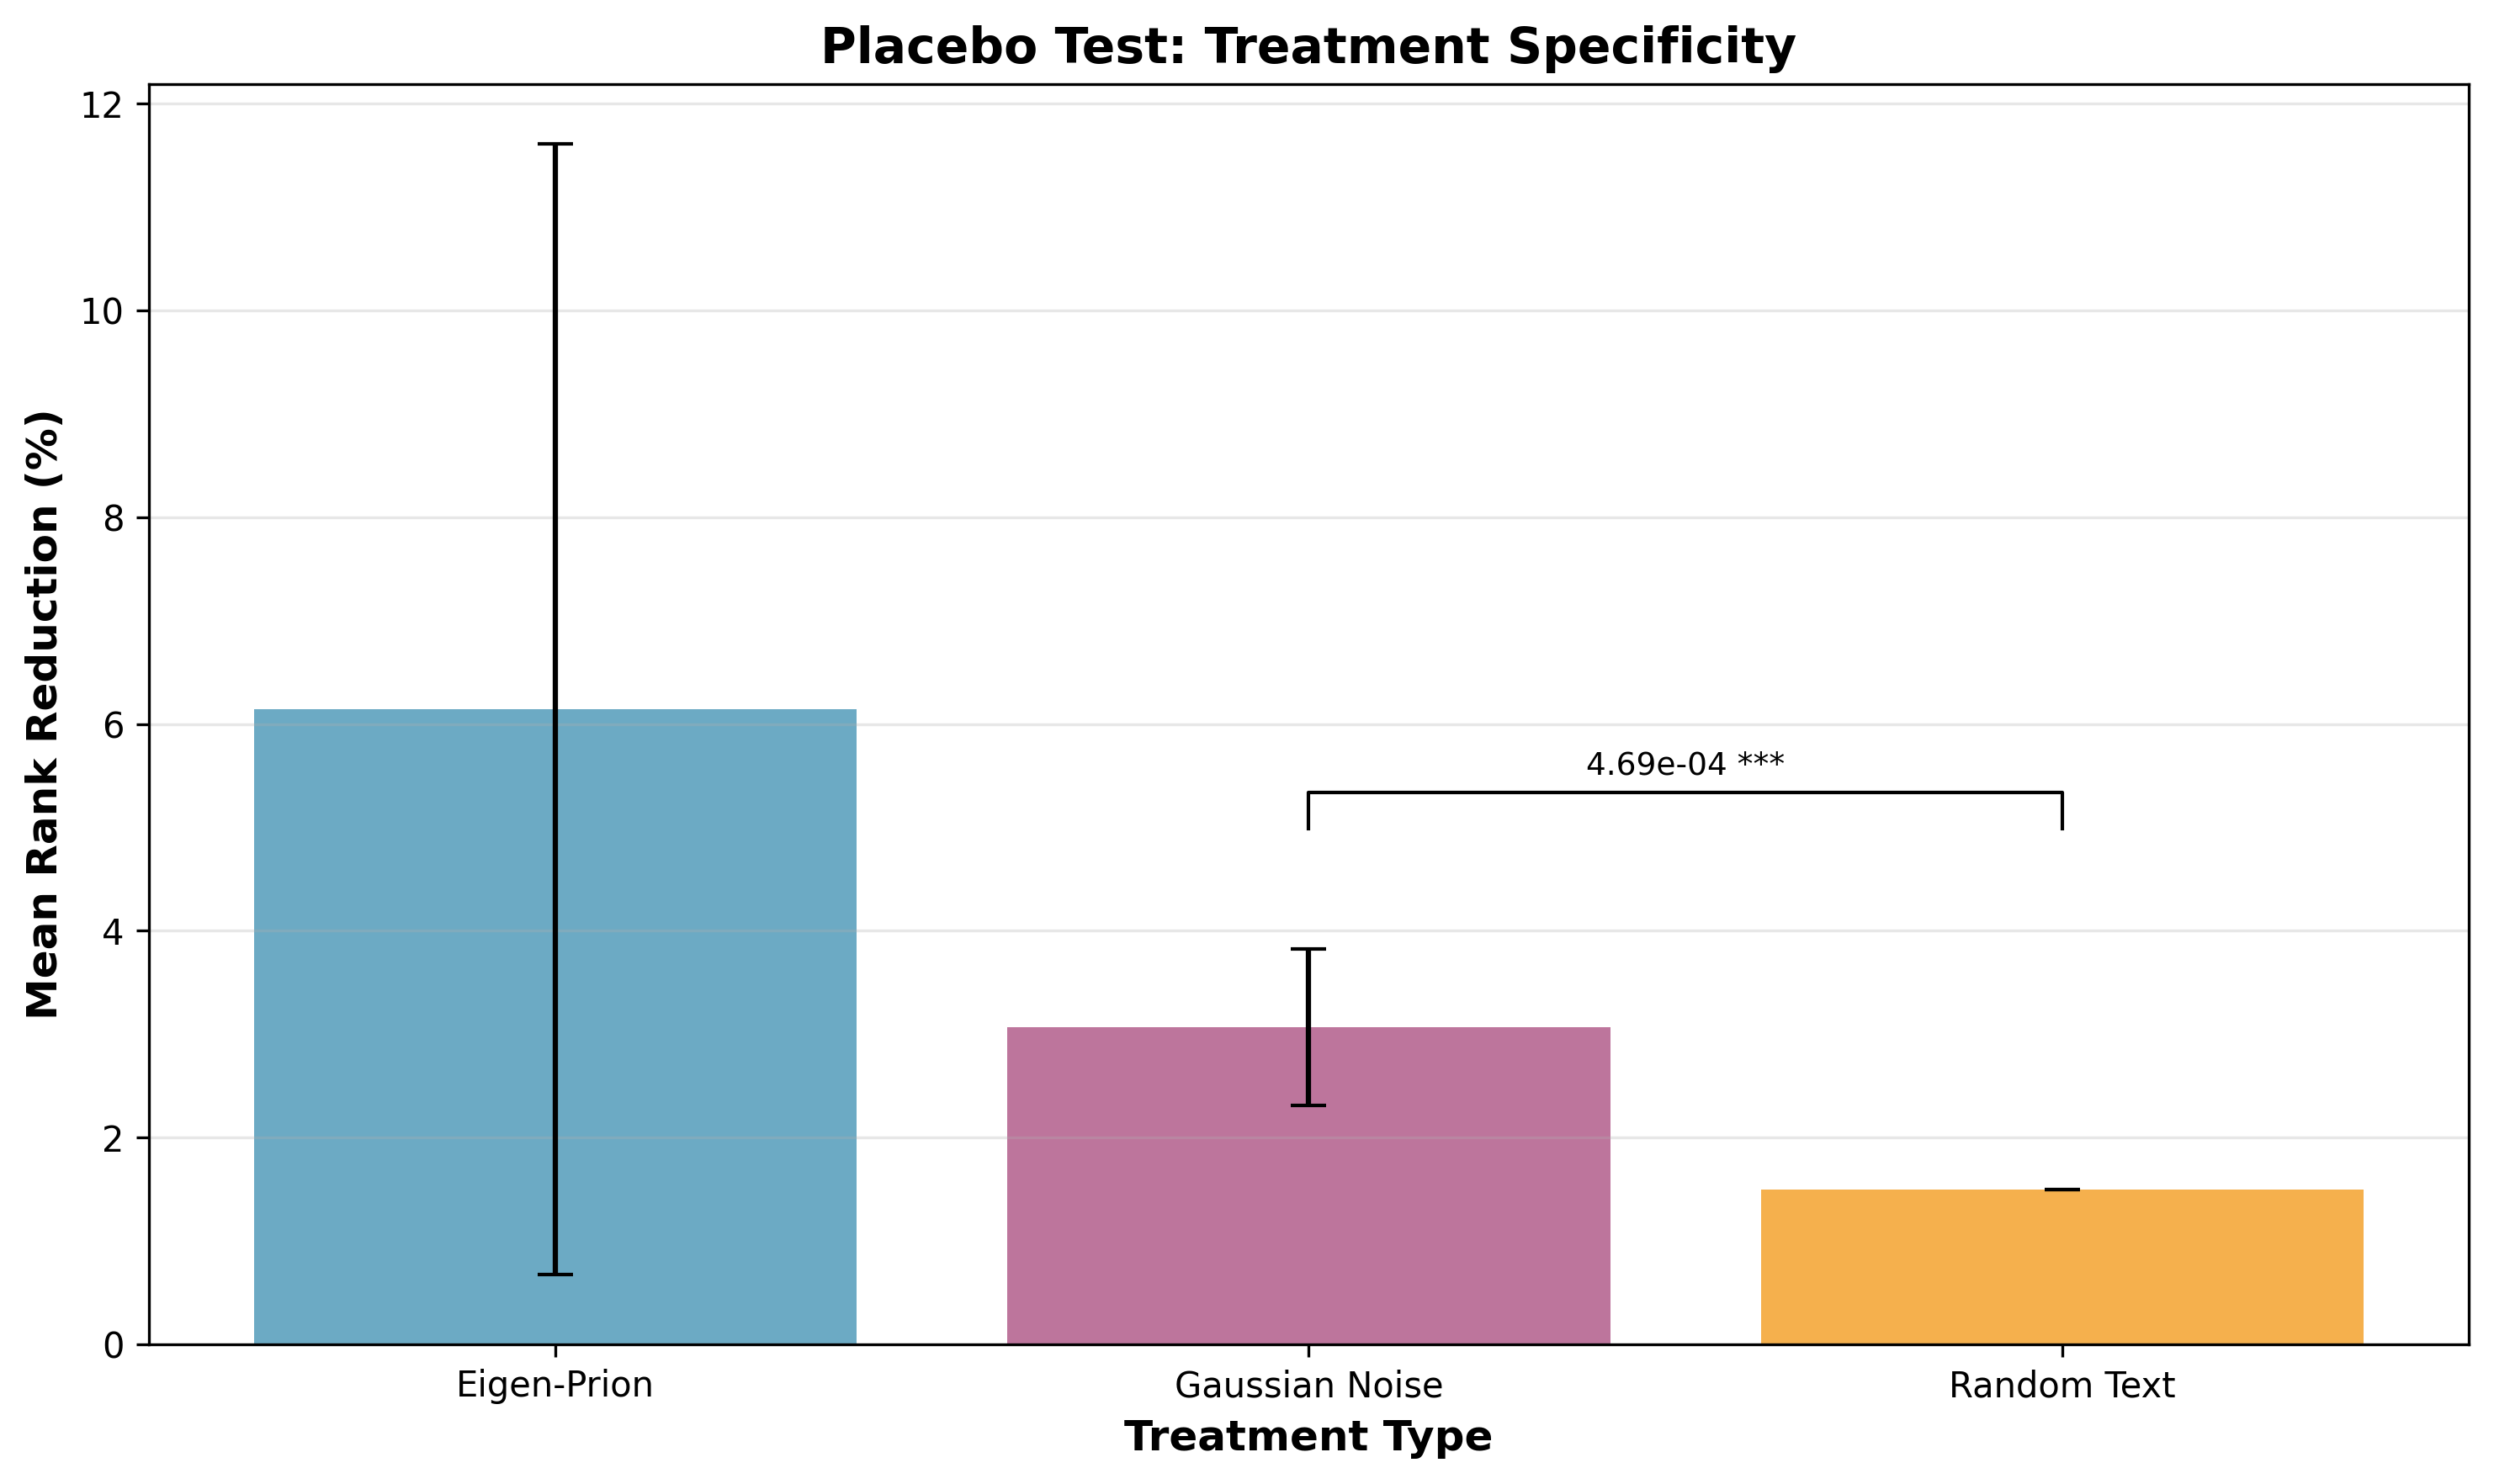

In [10]:
# Example 2: Priority 2 - Placebo Test Analysis
# ===============================================

results_dir = project_root / "experiments" / "results" / "priority2_placebo" / "raw_data"
output_dir = project_root / "experiments" / "results" / "priority2_placebo"
model = "410m"
treatments = ["eigen_prion", "gaussian_noise", "random_text"]

# Uncomment to run analysis:
# run_priority2_analysis(results_dir, model, treatments, output_dir)

# Visualize results (if analysis has been run):
if output_dir.exists():
    visualize_priority2_results(output_dir)
else:
    print("⚠️ Results directory not found. Run analysis first or adjust paths.")


📊 Optimizer Comparison:
optimizer  mean_rank_reduction_pct  std_dev_rank_reduction_pct  min_rank_reduction_pct  max_rank_reduction_pct  num_runs  mean_baseline_perplexity  std_dev_baseline_perplexity  min_baseline_perplexity  max_baseline_perplexity  mean_post_attack_perplexity  std_dev_post_attack_perplexity  min_post_attack_perplexity  max_post_attack_perplexity  mean_perplexity_increase_pct  std_dev_perplexity_increase_pct  min_perplexity_increase_pct  max_perplexity_increase_pct
    adamw                   6.1400                      5.4670                    2.37                   12.41         3                 5206.9202                          0.0                5206.9202                5206.9202                   59472.5560                       4253.1189                  55918.4417                  64184.7834                     1042.1830                          81.6820                     973.9255                    1132.6823
      sgd                   2.3733             

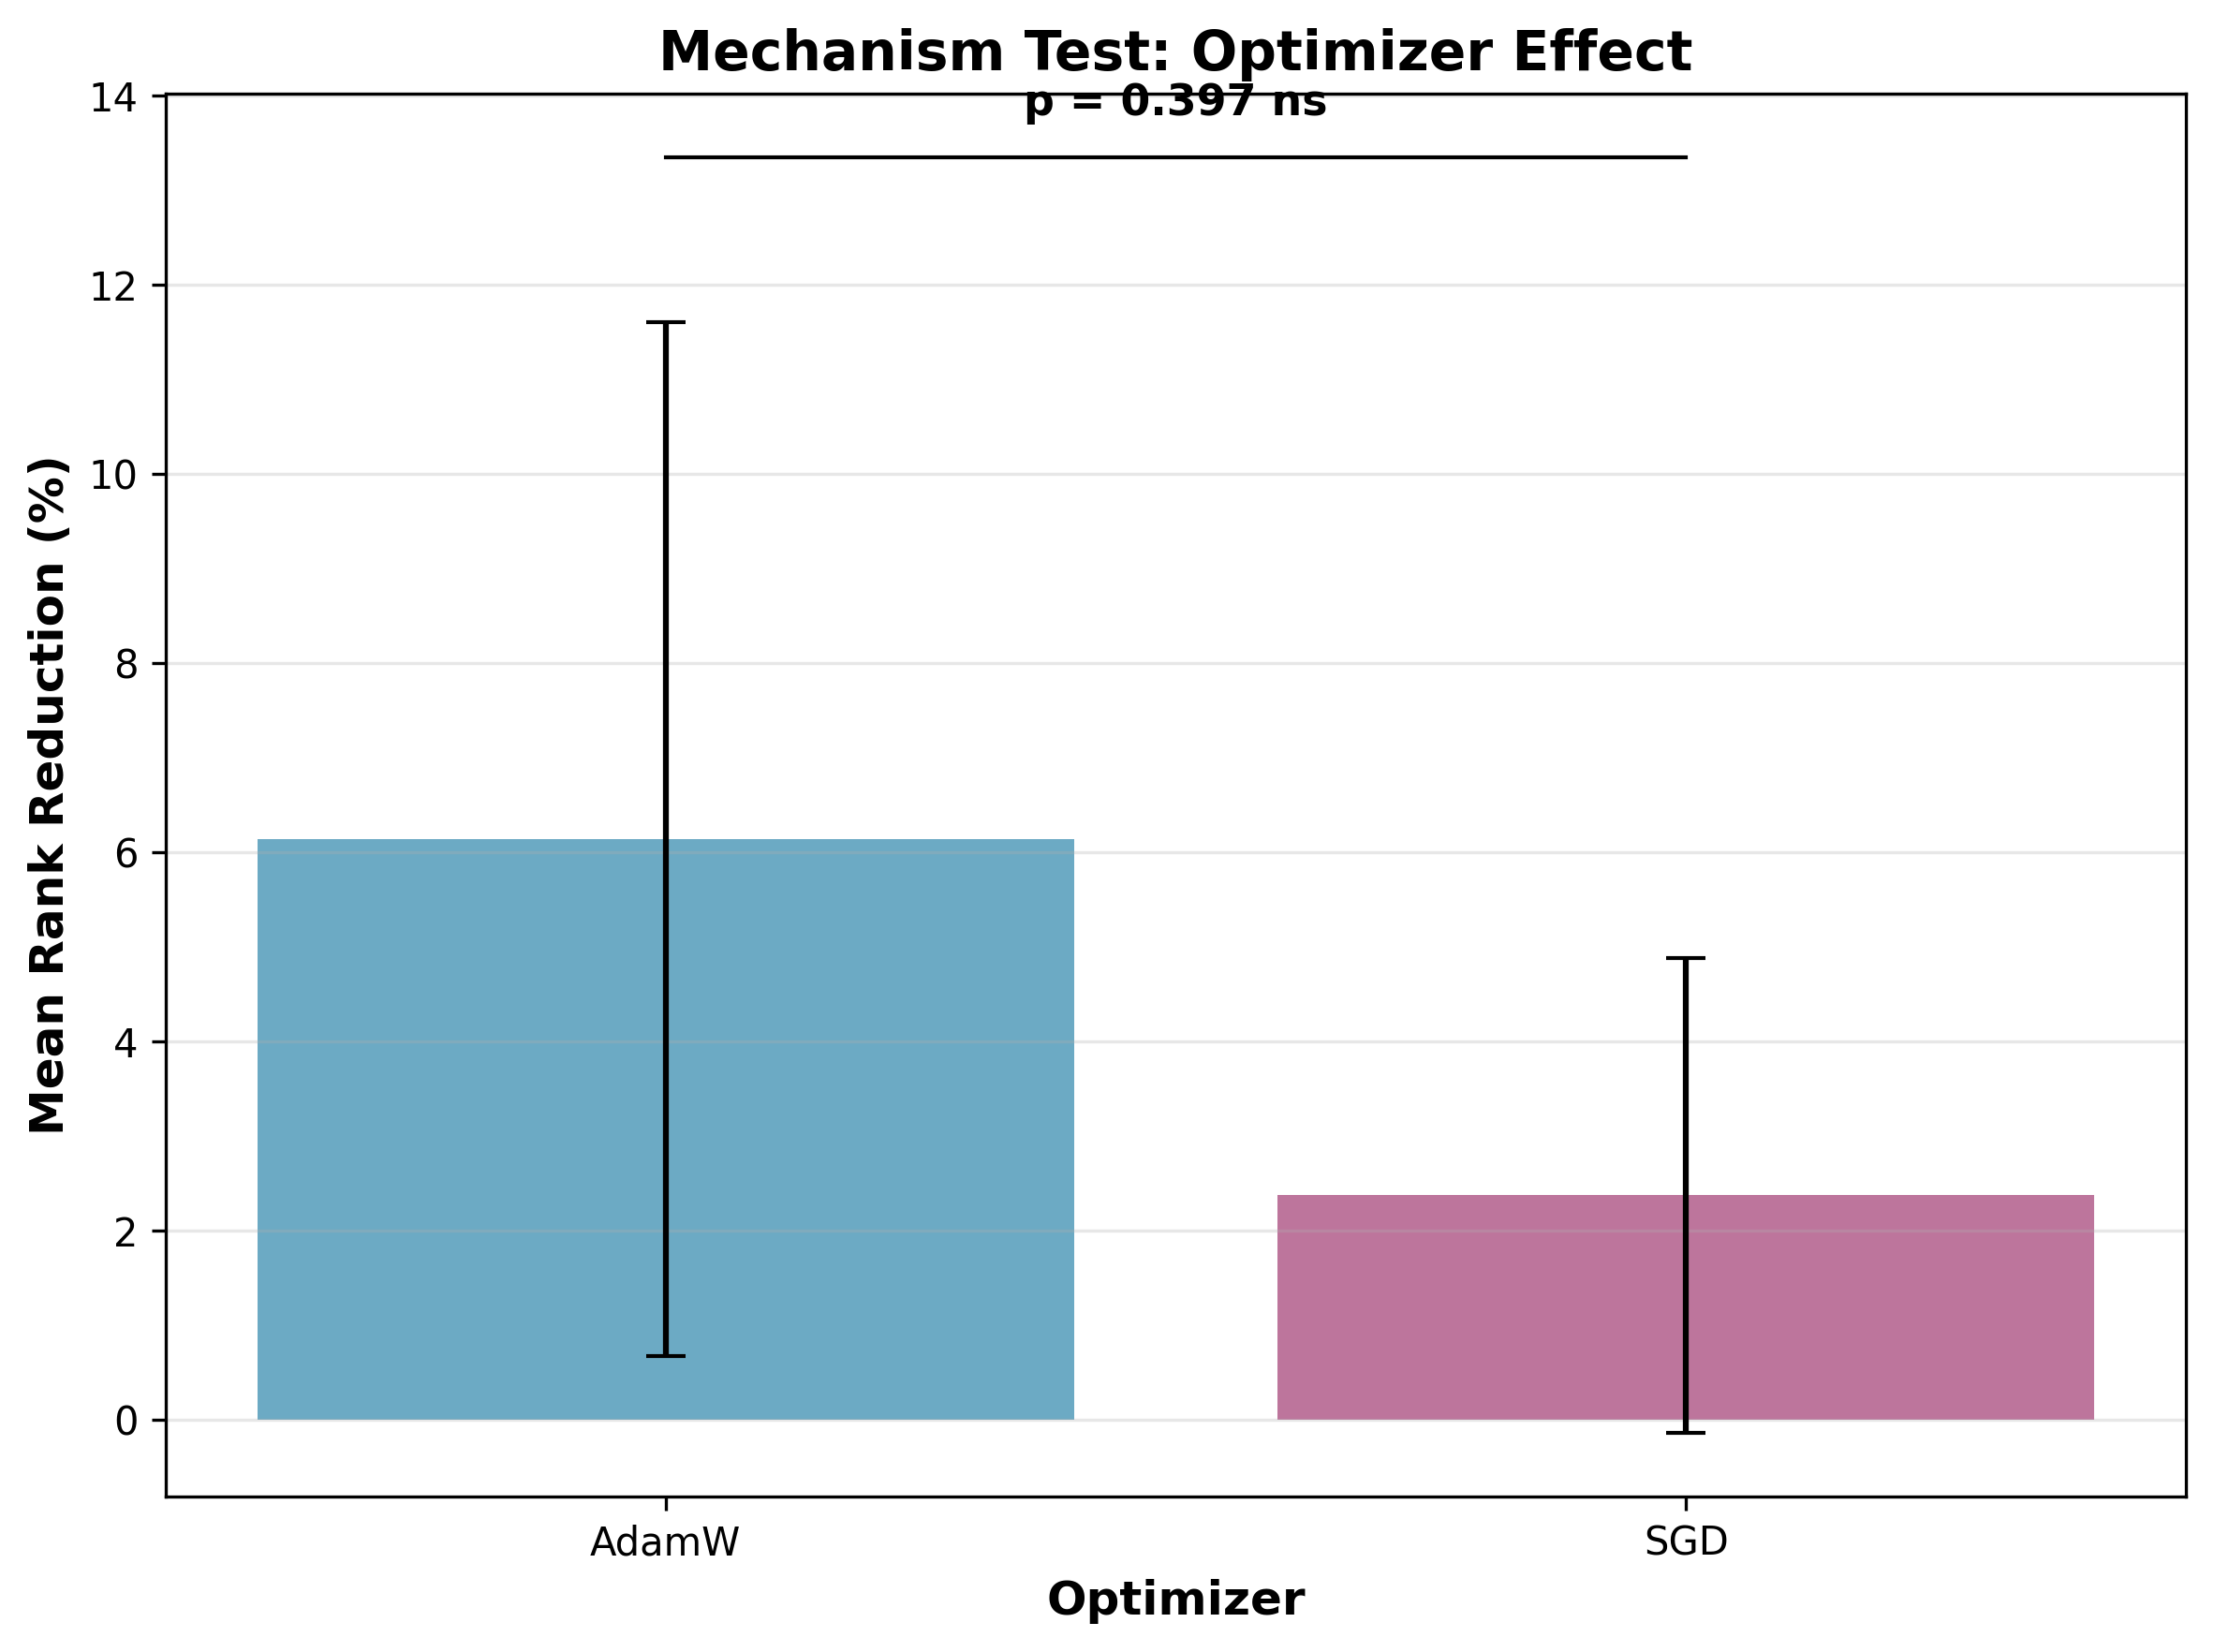

In [11]:
# Example 3: Priority 3 - Mechanism Test Analysis
# ==================================================

results_dir = project_root / "experiments" / "results" / "priority3_mechanism" / "raw_data"
output_dir = project_root / "experiments" / "results" / "priority3_mechanism"
model = "410m"
optimizers = ["adamw", "sgd"]

# Uncomment to run analysis:
# run_priority3_analysis(results_dir, model, optimizers, output_dir)

# Visualize results (if analysis has been run):
if output_dir.exists():
    visualize_priority3_results(output_dir)
else:
    print("⚠️ Results directory not found. Run analysis first or adjust paths.")


📊 Quantization Shield Comparison:
precision  mean_rank_reduction_pct  std_dev_rank_reduction_pct  min_rank_reduction_pct  max_rank_reduction_pct  num_runs  mean_baseline_perplexity  std_dev_baseline_perplexity  min_baseline_perplexity  max_baseline_perplexity  mean_post_attack_perplexity  std_dev_post_attack_perplexity  min_post_attack_perplexity  max_post_attack_perplexity  mean_perplexity_increase_pct  std_dev_perplexity_increase_pct  min_perplexity_increase_pct  max_perplexity_increase_pct
     fp16                  21.5033                      5.7592                   16.61                   27.85         3                 6391.3341                          0.0                6391.3341                6391.3341                 1883268.8107                    2414823.8152                 368464.5239                4668083.1071                    29365.9734                       37782.7816                    5665.0643                   72937.6947
     8bit                   0.3000   

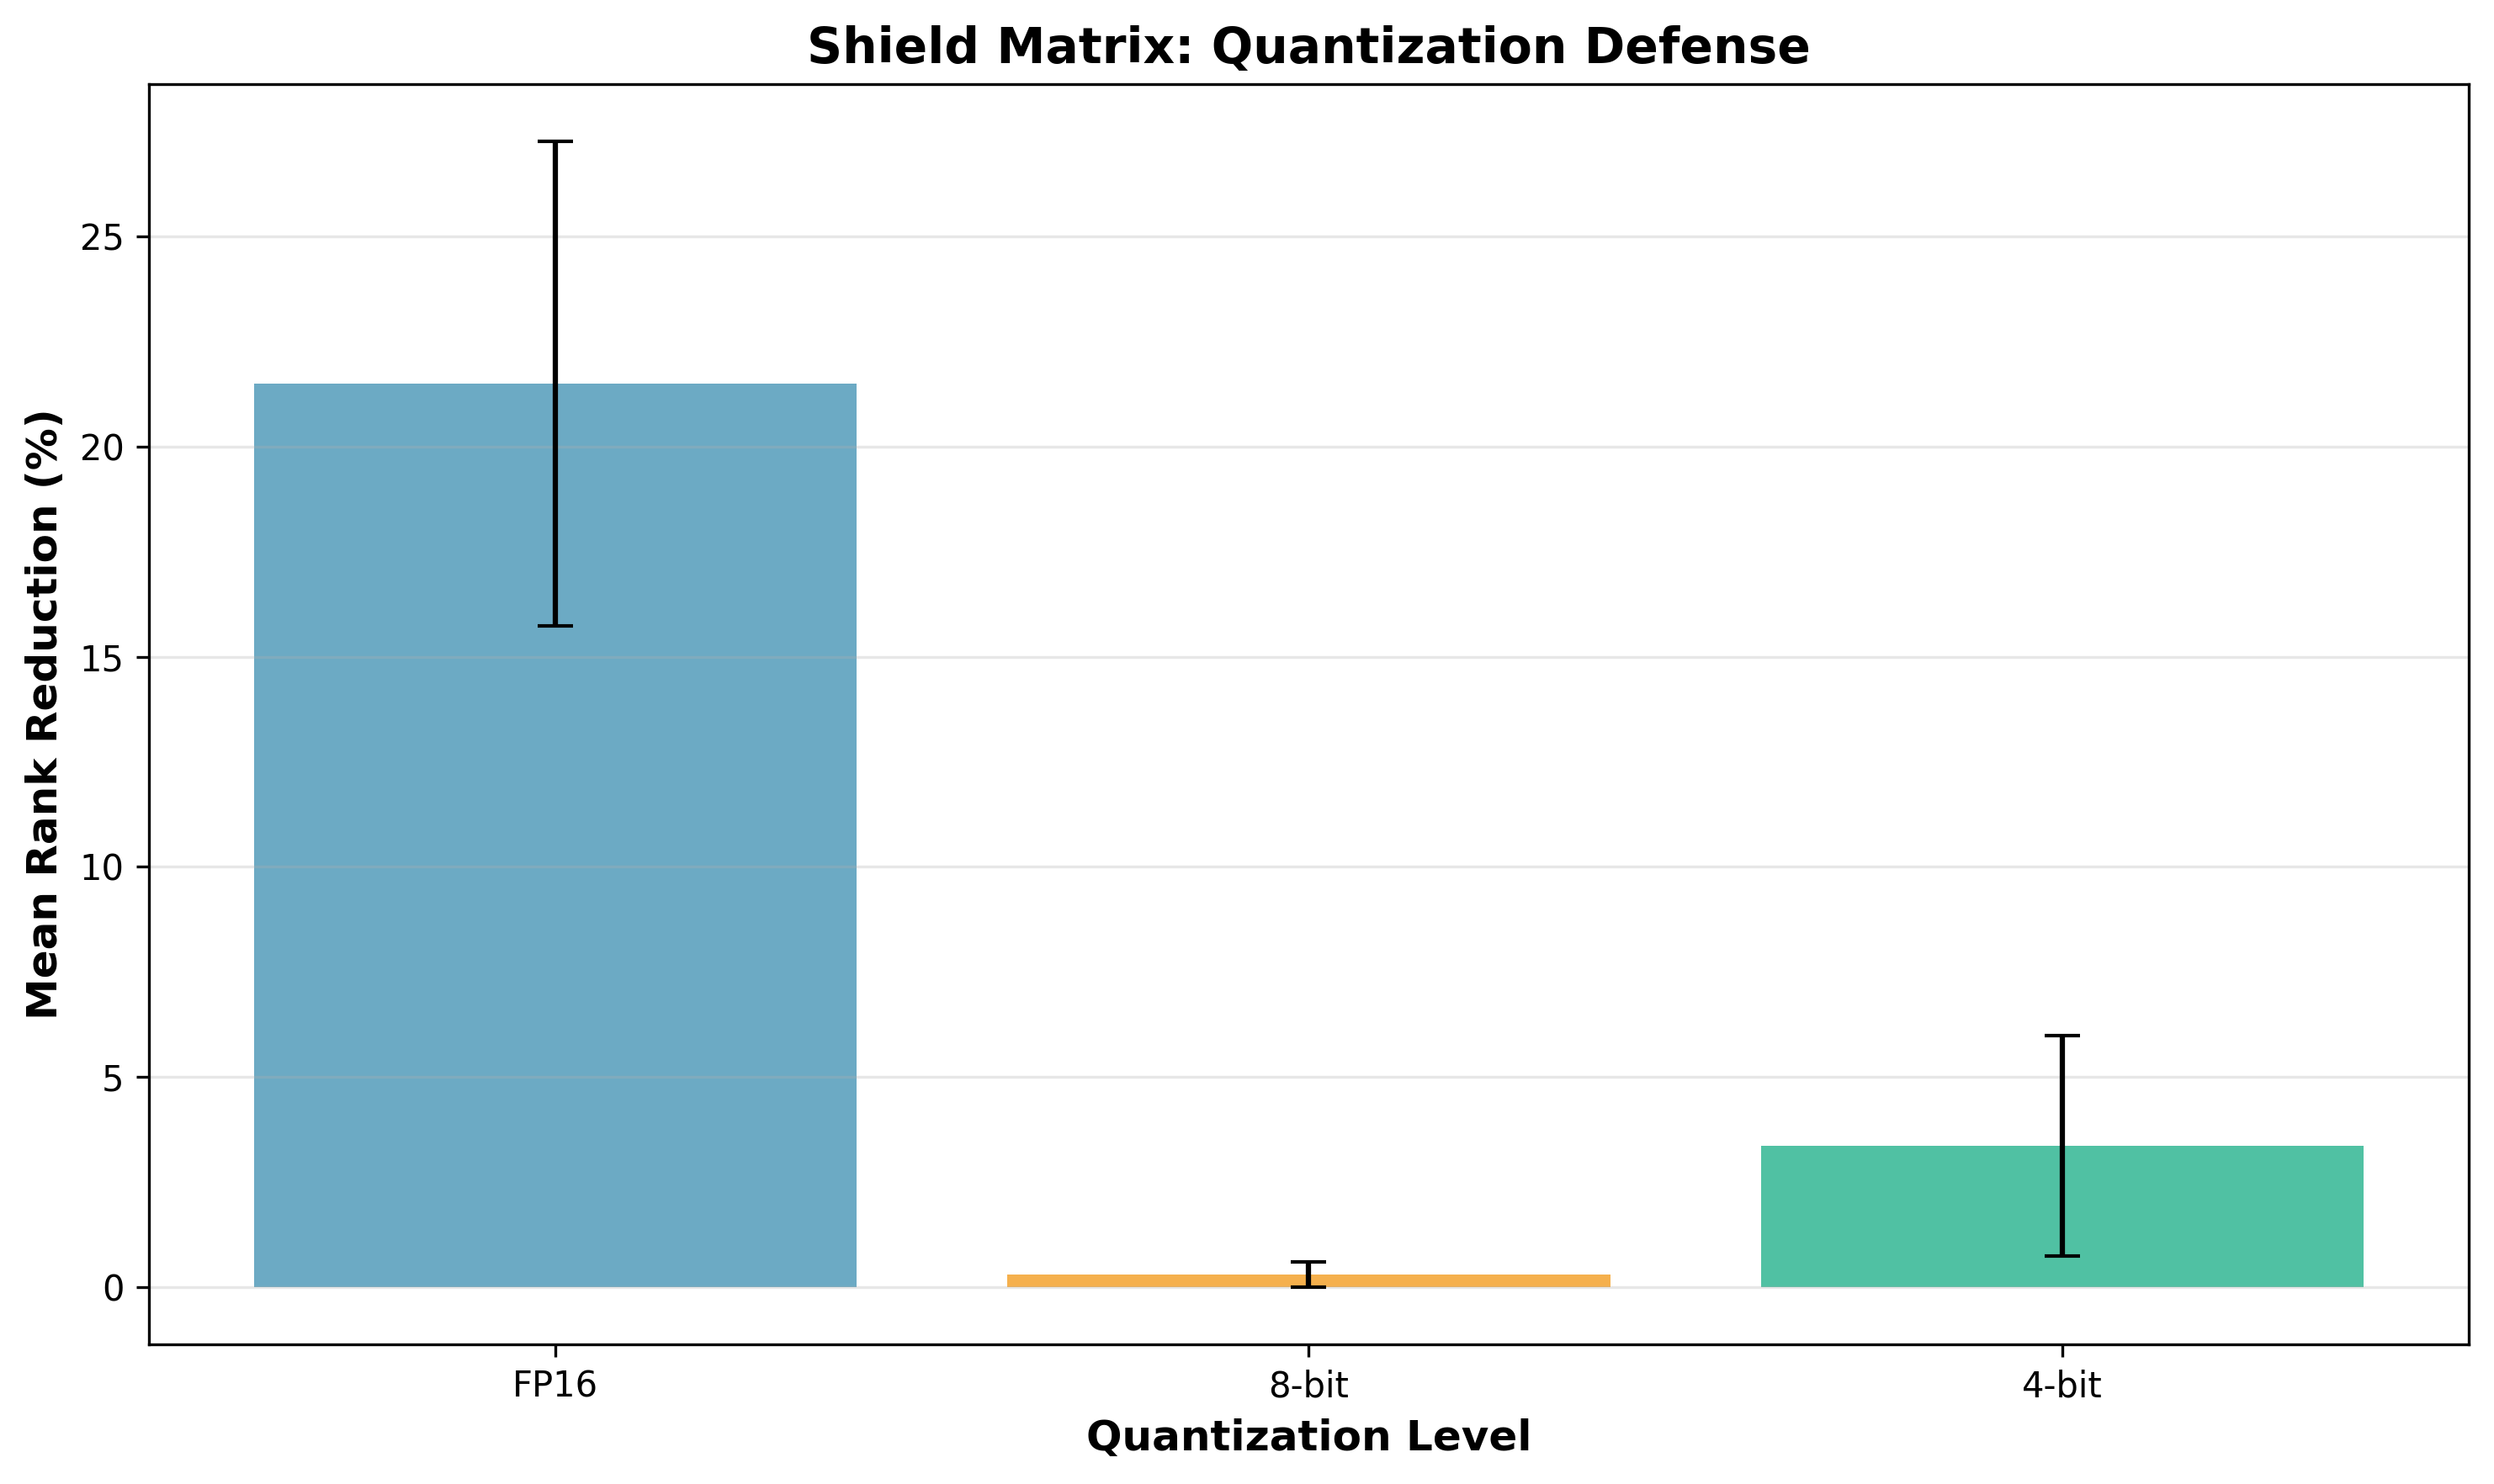

In [12]:
# Example 4: Priority 4 - Shield Matrix Analysis
# ================================================

results_dir = project_root / "experiments" / "results" / "priority4_shield" / "raw_data"
output_dir = project_root / "experiments" / "results" / "priority4_shield"
model = "1b"
precisions = ["fp16", "8bit", "4bit"]

# Uncomment to run analysis:
# run_priority4_analysis(results_dir, model, precisions, output_dir)

# Visualize results (if analysis has been run):
if output_dir.exists():
    visualize_priority4_results(output_dir)
else:
    print("⚠️ Results directory not found. Run analysis first or adjust paths.")

## Custom Visualizations

You can also load the analysis results and create custom visualizations:

In [13]:
# Custom Visualization: Compare all Priorities
# =============================================

def load_all_summaries():
    """
    Load summary data from all priority analyses
    """
    summaries = {}
    
    priorities = {
        1: ("priority1_scaling_law", "scaling_law_summary.csv"),
        2: ("priority2_placebo", "placebo_summary.csv"),
        3: ("priority3_mechanism", "mechanism_summary.csv"),
        4: ("priority4_shield", "shield_summary.csv"),
    }
    
    for priority, (dir_name, csv_file) in priorities.items():
        csv_path = project_root / "experiments" / "results" / dir_name / csv_file
        if csv_path.exists():
            summaries[priority] = pd.read_csv(csv_path)
            print(f"✅ Loaded Priority {priority} summary ({len(summaries[priority])} entries)")
        else:
            print(f"⚠️ Priority {priority} summary not found: {csv_path}")
    
    return summaries

# Load all summaries
all_summaries = load_all_summaries()

# Example: Create a combined visualization
if len(all_summaries) > 0:
    print(f"\n📊 Loaded {len(all_summaries)} priority summaries")
    print("\nAvailable summaries:")
    for priority, df in all_summaries.items():
        print(f"  Priority {priority}: {df.shape[0]} rows, {df.shape[1]} columns")
        print(f"    Columns: {', '.join(df.columns[:5])}...")
else:
    print("\n⚠️ No summaries found. Run analyses first.")

✅ Loaded Priority 1 summary (4 entries)
✅ Loaded Priority 2 summary (3 entries)
✅ Loaded Priority 3 summary (2 entries)
✅ Loaded Priority 4 summary (3 entries)

📊 Loaded 4 priority summaries

Available summaries:
  Priority 1: 4 rows, 22 columns
    Columns: model_name, model_size, model_size_millions, num_runs, mean_rank_reduction_pct...
  Priority 2: 3 rows, 18 columns
    Columns: treatment, mean_rank_reduction_pct, std_dev_rank_reduction_pct, min_rank_reduction_pct, max_rank_reduction_pct...
  Priority 3: 2 rows, 18 columns
    Columns: optimizer, mean_rank_reduction_pct, std_dev_rank_reduction_pct, min_rank_reduction_pct, max_rank_reduction_pct...
  Priority 4: 3 rows, 18 columns
    Columns: precision, mean_rank_reduction_pct, std_dev_rank_reduction_pct, min_rank_reduction_pct, max_rank_reduction_pct...
